In [11]:
path = os.getcwd() + '/Session/'
savepath = os.getcwd() + '/Figures/test/'
savepath_pdf = os.getcwd() + '/Figures/test/pdf/'
savepath_png = os.getcwd() + '/Figures/test/png/'
savepath_svg = os.getcwd() + '/Figures/test/svg/'

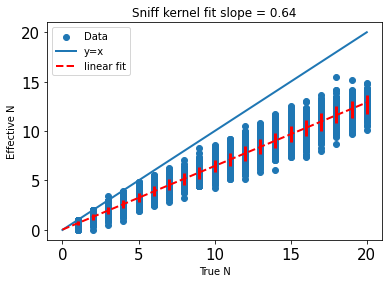

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import linregress
import os
import numpy as np
from scipy.interpolate import interp1d
from scipy.special import erf, erfinv
from numpy.random import choice
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import copy
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['svg.fonttype'] = 'none'

# Load data
# change working directory
#os.chdir('/Users/farhad/Dropbox/AllCodes/CodesHarvard/CountingPCx/')
behav = loadmat('behaviour_data.mat')
d = pd.read_csv('behavioral_data_for_Farhad_with_eff_odor.csv')

# Initialize variables
xopts = []
xoptsX = []
ns = np.arange(1, 21)
nNs = []
ia = 0
y = []

if ia == 0:
    for ni in range(1, 21):
        nNs.append(np.sum(behav['pooled_pulse_counts'] == ni))
        #y.append(behav['Phighs_pooled_mean'][behav['NsUnique'] == ni].flatten())
        y.append(behav['Phighs_pooled_mean'].flatten()[np.where(behav['NsUnique'] == ni)[0][0]])
    idx = np.where((d['Total Pulse'] < 21) & (d['Total Pulse'] > 0) & (d['Animal'] > -1))[0]
else:
    idx = np.where((d['Animal'] == ia - 1) & (d['Total Pulse'] < 21) & (d['Total Pulse'] > 0))[0]
    y = []
    for ni in range(1, 21):
        y.append(behav['PhighAnimals'][ia - 1, behav['NsUnique2'] == ni].flatten())

# Process the data for the main figure plot
Nisorig = d['Total Pulse'].iloc[idx].values
yisorig = d['High Choice'].iloc[idx].values
wNsorig = d['Effective_odor'].iloc[idx].values


# Plotting
plt.figure()
plt.scatter(Nisorig, wNsorig)
plt.xlabel('True N')
plt.ylabel('Effective N')
plt.plot([0, 20], [0, 20], '-', linewidth=2)
plt.grid(which='minor', linestyle='--')

p = np.polyfit(Nisorig, wNsorig, 1)
# Linear fit
slope, intercept, _, _, _ = linregress(Nisorig, wNsorig)
x_fit = np.linspace(0, 20, 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, 'r--', linewidth=2)
plt.title(f'Sniff kernel fit slope = {slope:.2f}')

# Error bars for each ni
for ni in range(1, 21):
    ni_idx = np.where(Nisorig == ni)[0]
    if len(ni_idx) > 0:
        plt.errorbar(ni, np.mean(wNsorig[ni_idx]), yerr=np.std(wNsorig[ni_idx]), color='r', linewidth=3)

plt.legend(['Data', 'y=x', 'linear fit'])
plt.gca().tick_params(axis='both', which='major', labelsize=15)
plt.show()


In [5]:
print(np.array(nNs).sum())

19911


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


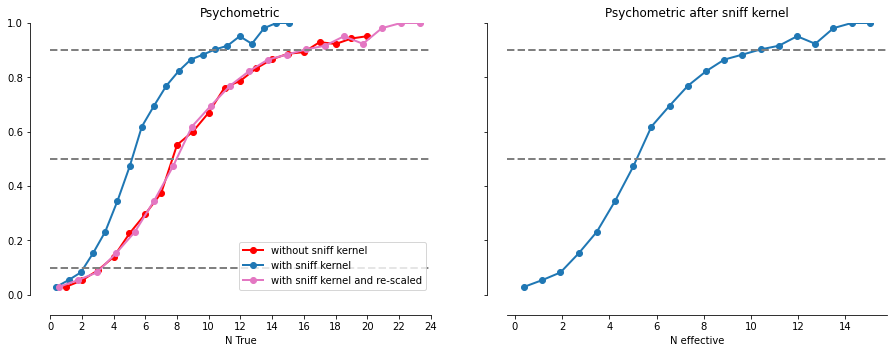

In [20]:
import numpy as np
import matplotlib.pyplot as plt
bincenters = np.unique(Nisorig)
print(bincenters)
Nbins = len(bincenters)
# Calculate psychometric values by bin
ypsy = []; bincounts = []
for ni in range(1,Nbins+1):
    bin_indices = np.where(Nisorig == ni)[0]
    if bin_indices.size > 0:
        ypsy.append(np.mean(yisorig[bin_indices]))
        bincounts.append(len(bin_indices))
    else:
        ypsy.append(np.nan)  # Handle empty bins if necessary
        bincounts.append(0)



# Parameters
NbinsW = 20

# Generate bin edges and bin centers
edges = np.linspace(0, np.max(wNsorig), NbinsW + 1)
binWcenters = (edges[1:] + edges[:-1]) / 2

# Bin the effective N values
wbinid = np.digitize(wNsorig, edges)  
NisWorig = copy.deepcopy(wbinid)

# Calculate psychometric values by bin
ypsyW = []; bincountsW = []
for ni in range(1,NbinsW+1):
    #bin_indices = np.where(NisWorig == ni)[0]
    bin_indices = np.where((wNsorig>edges[ni-1]) & (wNsorig<edges[ni]))[0]
    if bin_indices.size > 0:
        ypsyW.append(np.mean(yisorig[bin_indices]))
        bincountsW.append(len(bin_indices))
    else:
        ypsyW.append(np.nan)  # Handle empty bins if necessary
        bincountsW.append(0)


fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey = True)
# Plot the psychometric curve

# Calculate sigmaNeffective in terms of True N
binWcenters_inTrueN = binWcenters / p[0] - p[1] / p[0]
ax[0].plot(bincenters, ypsy, '-or', linewidth=2, label = 'without sniff kernel')
ax[0].set_title('Psychometric')
ax[0].set_xlabel('N True')
ax[0].axhline(0.5, linestyle='--', color='grey', linewidth=2)
ax[0].grid(which='minor', linestyle='--')
ax[0].plot(binWcenters, ypsyW, '-o', linewidth=2, color = 'tab:blue', label = 'with sniff kernel', clip_on='False') #_inTrueN
ax[0].plot(binWcenters_inTrueN, ypsyW, '-o', linewidth=2, color = 'tab:pink', label = 'with sniff kernel and re-scaled', clip_on='False') #_inTrueN

ax[0].axhline(0.9, linestyle='--', color='grey', linewidth=2)
ax[0].axhline(0.1, linestyle='--', color='grey', linewidth=2)


ax[0].legend()
ax[0].set_ylim(0,1)
ax[0].set_xlim(0,24)
ax[0].set_xticks(np.arange(0,25,2))
#plt.gca().tick_params(axis='both', which='major', labelsize=15)


ax[1].plot(binWcenters, ypsyW, '-o', linewidth=2)
ax[1].set_title('Psychometric after sniff kernel')
ax[1].set_xlabel('N effective')
ax[1].axhline(0.5, linestyle='--', color='grey', linewidth=2)
ax[1].axhline(0.9, linestyle='--', color='grey', linewidth=2)
ax[1].grid(which='minor', linestyle='--')
sns.despine(offset=20)

fig.savefig(savepath_svg + 'psychometrics_with_and_without_sniff_kernel.svg', format='svg', transparent='true', bbox_inches='tight')
fig.savefig(savepath_png + 'psychometrics_with_and_without_sniff_kernel.png', format='png', transparent='true', bbox_inches='tight')

plt.show()

/var/folders/xy/wcn_mfbd55s9g3lg4nhmyp_m0000gn/T/ipykernel_24733/1684609164.py:31: RuntimeWarning: invalid value encountered in true_divide
  sigmaN = np.sqrt(((k - Nb) / erfinv(2 * yboot - 1)) ** 2 / 2 - sigmab ** 2)
/var/folders/xy/wcn_mfbd55s9g3lg4nhmyp_m0000gn/T/ipykernel_24733/1684609164.py:3: RuntimeWarning: divide by zero encountered in true_divide
  F = lambda x, N: 0.5 * (1 + erf((N - x[-2]) / np.sqrt(2 * (x[np.round(N).astype(int) - 1] ** 2 + x[-1] ** 2))))  # Phigh function
/var/folders/xy/wcn_mfbd55s9g3lg4nhmyp_m0000gn/T/ipykernel_24733/1684609164.py:36: RuntimeWarning: divide by zero encountered in log
  loglikelihood = lambda x: -np.nanmean(np.log(F(x, Nis)) * yis + np.log(1 - F(x, Nis)) * (1 - yis))
/var/folders/xy/wcn_mfbd55s9g3lg4nhmyp_m0000gn/T/ipykernel_24733/1684609164.py:36: RuntimeWarning: invalid value encountered in multiply
  loglikelihood = lambda x: -np.nanmean(np.log(F(x, Nis)) * yis + np.log(1 - F(x, Nis)) * (1 - yis))


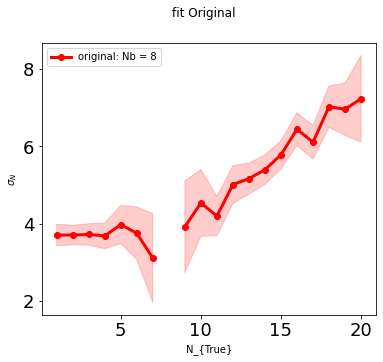

In [3]:

# Parameters
k = np.arange(1, Nbins + 1)
F = lambda x, N: 0.5 * (1 + erf((N - x[-2]) / np.sqrt(2 * (x[np.round(N).astype(int) - 1] ** 2 + x[-1] ** 2))))  # Phigh function
xall_data_theory = []
lks = []
Nboot = 1000
numNbs = 1

for i in range(Nboot + 1):
    # Bootstrapping index
    if i == 0:
        idxboot = np.arange(len(yisorig))
    else:
        idxboot = choice(len(yisorig), len(yisorig), replace=True)

    Nis = Nisorig[idxboot]
    yis = yisorig[idxboot]

    # Find average psychometric for this bootstrap
    yboot = []
    for ni in range(1, Nbins + 1):
        ni_indices = np.where(Nis == ni)[0]
        yboot.append(np.mean(yis[ni_indices]) if ni_indices.size > 0 else np.nan)

    yboot = np.array(yboot)

    Nb = np.argsort(np.abs(yboot-0.5))[0] + 1  # Find the closest bin to 0.5
    #Nbs = [Nb]
    #for Nb in Nbs:
    sigmab = 0
    sigmaN = np.sqrt(((k - Nb) / erfinv(2 * yboot - 1)) ** 2 / 2 - sigmab ** 2)
    sigmaN[np.where(k == Nb)] = np.nan  # Exclude sigmaNs for integers

    # Construct x and calculate log-likelihood
    x = np.concatenate([sigmaN, [Nb, sigmab]])
    loglikelihood = lambda x: -np.nanmean(np.log(F(x, Nis)) * yis + np.log(1 - F(x, Nis)) * (1 - yis))
    lks.append(loglikelihood(x) * 1000)
    xall_data_theory.append(x)
        
xall_data_theory = np.array(xall_data_theory)
lks = np.array(lks)

# Set up the figure
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
# Plot in the first subplot (Effective N space)
sigmaNs = xall_data_theory[:, 0:Nbins]
ax.plot(bincenters,  sigmaNs[0,:], '-or', linewidth=3, label = 'original: Nb = 8')
sigmaNs_low =  sigmaNs[0,:] - np.nanstd( sigmaNs[1:], axis=0)
sigmaNs_high = sigmaNs[0,:] + np.nanstd( sigmaNs[1:], axis=0)
ax.fill_between(bincenters, sigmaNs_low, sigmaNs_high, color='r', alpha=0.2)
ax.set_xlabel('N_{True}')
ax.set_ylabel(r'$\sigma_N$')
ax.grid(True, which='minor')
ax.legend(loc = 'upper left')
ax.tick_params(axis='both', which='major', labelsize=18)
fig.suptitle('fit Original')
plt.show()



5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.01212344

/var/folders/xy/wcn_mfbd55s9g3lg4nhmyp_m0000gn/T/ipykernel_24733/3076585925.py:37: RuntimeWarning: invalid value encountered in true_divide
  sigmaN = np.sqrt(((binWcenters - Nbeffective) /     erfinv(2 * yboot - 1)) ** 2 / 2 - sigmab ** 2)


5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.01212344

/Users/boero/opt/anaconda3/envs/all_behavior/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178
5.012123449928178


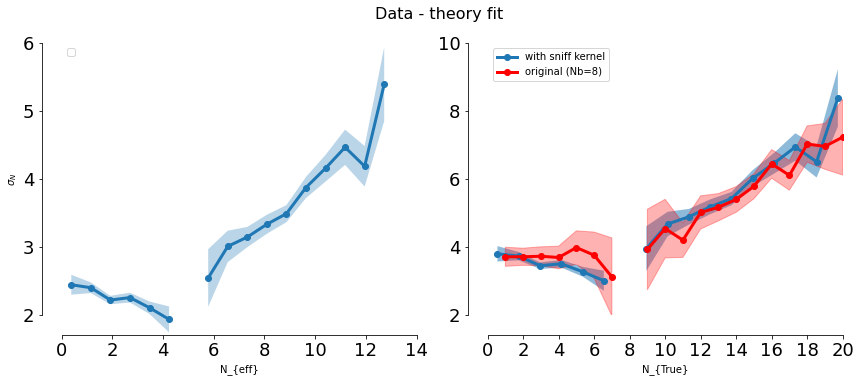

In [36]:

# Parameters
k = np.arange(1, NbinsW + 1)
interp_sigmaN = interp1d(k, binWcenters, bounds_error=False, fill_value=None)
#F = lambda x, N: 0.5 * (1 + erf((N - x[-2]) / np.sqrt(2 * (x[np.round(N).astype(int) - 1] ** 2 + x[-1] ** 2))))  # Phigh function
xall_data_theoryW = []
lksW = []

for i in range(Nboot + 1):
    # Bootstrapping index
    if i == 0:
        idxboot = np.arange(len(yisorig))
    else:
        idxboot = choice(len(yisorig), len(yisorig), replace=True)


    NisW = NisWorig[idxboot]
    yis = yisorig[idxboot]
    wNs = wNsorig[idxboot]

    # Find average psychometric for this bootstrap
    yboot = []
    for ni in range(1, NbinsW + 1):
        #ni_indices = np.where(NisW == ni)[0]
        ni_indices = np.where((wNs>edges[ni-1]) & (wNs<edges[ni]))[0]
        yboot.append(np.mean(yis[ni_indices]) if ni_indices.size > 0 else np.nan)

    yboot = np.array(yboot)

    
    Nb = np.argsort(np.abs(yboot-0.5))[0] + 1  # Find the closest bin to 0.5
    #Nbs = [Nb]
    Nbeffective = interp_sigmaN(Nb)
    print(Nbeffective)
    #for Nb in Nbs:
    sigmab = 0
    #sigmaN = np.sqrt(((k - Nb) / erfinv(2 * yboot - 1)) ** 2 / 2 - sigmab ** 2)
    sigmaN = np.sqrt(((binWcenters - Nbeffective) /     erfinv(2 * yboot - 1)) ** 2 / 2 - sigmab ** 2)
    sigmaN[np.where(k == Nb)] = np.nan  # Exclude sigmaNs for integers
    sigmaN[np.where(sigmaN == 0)] = np.nan  # Exclude 0 sigmaNs
    sigmaN[np.where(binWcenters_inTrueN>20)] = np.nan # Exclude values that map back to N>20 (out of range)

    # Construct x and calculate log-likelihood
    x = np.concatenate([sigmaN, [Nbeffective, sigmab]])
    #loglikelihood = lambda x: -np.nanmean(np.log(F(x, Nis)) * yis + np.log(1 - F(x, Nis)) * (1 - yis))
    #lksW.append(loglikelihood(x) * 1000)
    xall_data_theoryW.append(x)
        
xall_data_theoryW = np.array(xall_data_theoryW)
#lksW = np.array(lksW)


# Set up the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))


# Calculate sigmaNeffective using interpolation
sigmaNeffectives = []; sigmaNeffectives_inTrueN = []
for i in range(Nboot + 1):
    #sigmaNeffective = interp_sigmaN(xall_data_theoryW[i, 0:NbinsW])
    sigmaNeffective = xall_data_theoryW[i, 0:NbinsW]
    sigmaNeffectives.append(sigmaNeffective)
    sigmaNeffectives_inTrueN.append(sigmaNeffective / p[0])
sigmaNeffectives = np.array(sigmaNeffectives)
sigmaNeffectives_inTrueN = np.array(sigmaNeffectives_inTrueN)

# Plot in the first subplot (Effective N space)
sigmaNeffective = sigmaNeffectives[0,:]
ax1.plot(binWcenters, sigmaNeffective, '-o', linewidth=3, clip_on=False)
sigmaNeffective_low = sigmaNeffective - np.nanstd(sigmaNeffectives[1:], axis=0)
sigmaNeffective_high = sigmaNeffective + np.nanstd(sigmaNeffectives[1:], axis=0)
# Calculate Nbeffective for legends
Nbeffective = xall_data_theoryW[:, -2]

ax1.fill_between(binWcenters, sigmaNeffective_low, sigmaNeffective_high, alpha=0.3, clip_on=False) #label = f'{Nbeffective[0]:.2f}'

# sigmaNeffective_inTrueN = sigmaNeffective / p[0] - p[1] / p[0]
# sigmaNeffective_low_inTrueN = sigmaNeffective_low / p[0] - p[1] / p[0]
# sigmaNeffective_high_inTrueN = sigmaNeffective_high / p[0] - p[1] / p[0]
sigmaNeffective_inTrueN = sigmaNeffectives_inTrueN[0,:]
sigmaNeffective_low_inTrueN = sigmaNeffective_inTrueN - np.nanstd(sigmaNeffectives_inTrueN[1:], axis=0)
sigmaNeffective_high_inTrueN = sigmaNeffective_inTrueN + np.nanstd(sigmaNeffectives_inTrueN[1:], axis=0)
# sigmaNeffective_low_inTrueN = sigmaNeffective_inTrueN - np.nanstd(sigmaNeffectives[1:], axis=0)/ p[0]
# sigmaNeffective_high_inTrueN = sigmaNeffective_inTrueN + np.nanstd(sigmaNeffectives[1:], axis=0)/ p[0]
# Plot in the second subplot (True N space)
ax2.plot(binWcenters_inTrueN, sigmaNeffective_inTrueN, '-o', linewidth=3, label = 'with sniff kernel')
ax2.fill_between(binWcenters_inTrueN, sigmaNeffective_low_inTrueN, sigmaNeffective_high_inTrueN, alpha=0.5)
# Set titles and labels for both subplots
fig.suptitle('Data - theory fit', fontsize=16)
ax1.set_xlabel('N_{eff}')
ax2.set_xlabel('N_{True}')
ax1.set_ylabel(r'$\sigma_N$')
ax1.grid(True, which='minor')
ax2.grid(True, which='minor')
ax1.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)

# Display sigma_b text annotation in the first subplot
sigma_b_mean = np.mean(xall_data_theoryW[:, -1])
sigma_b_std = np.std(xall_data_theoryW[:, -1])
#ax1.text(1, 6.5, rf'$\sigma_b={sigma_b_mean:.2f} \pm {sigma_b_std:.2f}$', fontsize=18)


# Add legends
ax1.legend(loc='upper left')
SigmaNoKernel =sigmaNs[0,:]
ax2.plot(np.arange(1,21),SigmaNoKernel,'-or',lw = 3, label = 'original (Nb=8)')
ax2.fill_between(np.arange(1,21), SigmaNoKernel - np.nanstd(sigmaNs[1:], axis=0), SigmaNoKernel + np.nanstd(sigmaNs[1:], axis=0), alpha=0.3, color = 'r')
ax2.legend(loc='upper left')
ax1.set_ylim(2,6)
ax1.set_xlim(0,14)
ax1.set_xticks(np.arange(0,16,2))
ax2.set_ylim(2,10)
ax2.set_xlim(0,20)
ax2.set_xticks(np.arange(0,21,2))


sns.despine(offset=20)


plt.savefig(savepath_svg + 'new_fits_noise_model.svg', format='svg', transparent='true', bbox_inches='tight')
plt.savefig(savepath_png + 'new_fits_noise_model.png', format='png', transparent='true', bbox_inches='tight')


plt.show()



In [37]:
binWcenters

array([ 0.38554796,  1.15664387,  1.92773979,  2.6988357 ,  3.46993162,
        4.24102753,  5.01212345,  5.78321937,  6.55431528,  7.3254112 ,
        8.09650711,  8.86760303,  9.63869894, 10.40979486, 11.18089077,
       11.95198669, 12.7230826 , 13.49417852, 14.26527443, 15.03637035])

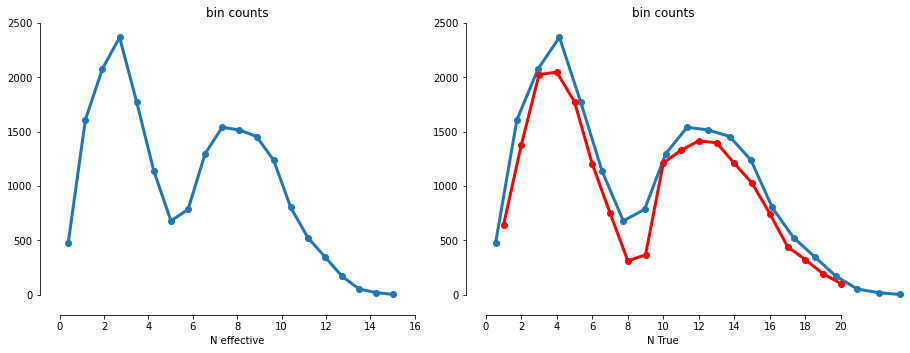

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
# plot bincounts
ax1.plot(binWcenters,bincountsW, '-o', lw = 3, clip_on=False)
ax1.set_title('bin counts')
ax1.set_xlabel('N effective')
ax1.set_ylim(0,2500)
ax1.set_xlim(0,16)


ax2.plot(binWcenters_inTrueN,bincountsW, '-o', lw = 3, color = 'tab:blue', clip_on=False)
ax2.plot(bincenters,bincounts, '-or', lw = 3, clip_on=False)
# grid minor
ax1.grid(True, which='minor')
ax2.grid(True, which='minor')
ax2.set_title('bin counts')
ax2.set_xlabel('N True')
ax2.set_ylim(0,2500)

ax2.set_xlim(0,20)
ax2.set_xticks(np.arange(0,21,2))

sns.despine(offset=20)

fig.savefig(savepath_svg + 'bin_counts_with_and_without_sniff_kernel.svg', format='svg', transparent='true', bbox_inches='tight')
fig.savefig(savepath_png + 'bin_counts_with_and_without_sniff_kernel.png', format='png', transparent='true', bbox_inches='tight')

#print(bincounts)
#print(bincountsW)
plt.show()


Comments on results: Variables xall_data_theory and xall_data_theoryW have the results of all data for the original and sniff-kernel-weighted fits.
The first row of them includes the results on all data. The second to last rows include the bootstrapped data. You can choose to show the mean of bootstrapped data (starting from second row), or show the result of original data (first row), and use the other rows to estimate the std or quantiles of uncertainty. This can be changed for plotting.

Also note, for each row, the last column is sigmab (which is set to 0), the second to last is Nb (which is found based on the rule of closest bin to y=0.5), and hence an estimate of uncertatinty of Nb can be found if needed.

In [7]:
# Old code with the ability to change Nb
# import numpy as np
# from scipy.interpolate import interp1d
# from scipy.special import erf, erfinv
# from numpy.random import choice

# # Parameters
# k = np.arange(1, NbinsW + 1)
# F = lambda x, N: 0.5 * (1 + erf((N - x[-2]) / np.sqrt(2 * (x[np.round(N).astype(int) - 1] ** 2 + x[-1] ** 2))))  # Phigh function
# xall_data_theoryW = []
# lks = []
# Nboot = 0
# numNbs = 1

# for i in range(Nboot + 1):
#     # Bootstrapping index
#     if i == 0:
#         idxboot = np.arange(len(yisorig))
#     else:
#         idxboot = choice(len(yisorig), len(yisorig), replace=True)
    
#     Nis = Nisorig[idxboot]
#     yis = yisorig[idxboot]

#     # Find average psychometric for this bootstrap
#     yboot = []
#     for ni in range(1, NbinsW + 1):
#         ni_indices = np.where(Nis == ni)[0]
#         yboot.append(np.mean(yis[ni_indices]) if ni_indices.size > 0 else np.nan)
    
#     yboot = np.array(yboot)

#     # Interpolation to find Nzerocrossing
#     nsq = np.arange(1, NbinsW, 0.01)
#     interp_func = interp1d(k, yboot, kind='linear', bounds_error=False, fill_value="extrapolate")
#     yq = interp_func(nsq)
#     Nzerocrossing = nsq[np.argmin(np.abs(yq - 0.5))]
#     Nb = Nzerocrossing
    
#     #Nb = 5.01 

#     # Alternate method for Nb
#     Nb = np.interp((p[0] * 8 + p[1]), binWcenters, k)

#     # Testing range of Nb values
#     if numNbs > 1:
#         Nbs = np.linspace(np.floor(Nb) + 0.01, np.floor(Nb) + 0.99, numNbs)
#         # Uncomment to include the integer bounds, e.g., 7 and 8
#         Nbs = np.linspace(np.floor(Nb), np.floor(Nb) + 1, numNbs)
#     else:
#         Nbs = [Nb]
#         Nbs = [np.argsort(np.abs(yboot-0.5))[0] + 1] # Find the closest bin to 0.5
#     for Nb in Nbs:
#         sigmab = 0
#         sigmaNs = np.sqrt(((k - Nb) / erfinv(2 * yboot - 1)) ** 2 / 2 - sigmab ** 2)
#         sigmaNs[np.where(k == Nb)] = np.nan  # Exclude sigmaNs for integers

#         # Construct x and calculate log-likelihood
#         x = np.concatenate([sigmaNs, [Nb, sigmab]])
#         loglikelihood = lambda x: -np.nanmean(np.log(F(x, Nis)) * yis + np.log(1 - F(x, Nis)) * (1 - yis))
#         lks.append(loglikelihood(x) * 1000)
#         xall_data_theoryW.append(x)
        
# xall_data_theoryW = np.array(xall_data_theoryW)
# lks = np.array(lks)


In [75]:
#Regression for the flat part

x_flat_og = bincenters[:7]
y_flat_og = sigmaNs[1:,:7].T

x_flat_w = binWcenters_inTrueN[:6]
y_flat_w = sigmaNeffectives_inTrueN[1:,:6].T

x_linear_og = bincenters[8:]
y_linear_og = sigmaNs[1:,8:].T

x_linear_w = binWcenters_inTrueN[7:]
y_linear_w = sigmaNeffectives_inTrueN[1:,7:].T



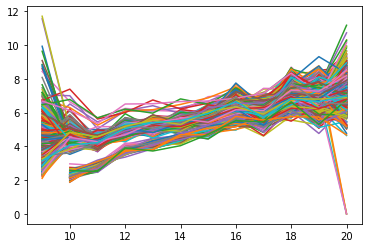

In [79]:
plt.plot(x_linear_og, y_linear_og)

In [88]:
# Filtrar valores NaN para cada punto de X
def remove_nans(X, Y_boot):
    mask = ~np.isnan(Y_boot)  # Matriz booleana que indica valores válidos
    X_filtered = np.tile(X, (Y_boot.shape[1], 1)).T[mask]  # Expandir y filtrar X
    Y_filtered = Y_boot[mask]  # Filtrar valores válidos de Y
    return X_filtered, Y_filtered

X_og_filtered, Y_og_filtered = remove_nans(x_flat_og, y_flat_og)
X_w_filtered, Y_w_filtered = remove_nans(x_flat_w, y_flat_w)

# Distribuciones de pendientes de las regresiones A y B
intercepts_w = []  # Distribución 1
intercepts_og = []  # Distribución 2

# Realiza regresión lineal para cada muestra de bootstrapping (como antes)
for i in range(y_flat_w.shape[1]):
    slope_w, intercept_w, _, _, _ = linregress(X_w_filtered, Y_w_filtered[:, i])
    intercepts_w.append(intercept_w)
for i in range(y_flat_og.shape[1]):
    slope_og, intercept_og, _, _, _ = linregress(X_og_filtered, Y_og_filtered[:, i])
    intercepts_og.append(intercept_og)

intercepts_w =  np.asarray(intercepts_w)
intercepts_og =  np.asarray(intercepts_og)    

from scipy.stats import ttest_ind

# Test de diferencia de medias (pendientes)
t_stat, p_value = ttest_ind(intercepts_w, intercepts_og, equal_var=False)
print(f"T-stat: {t_stat}, P-value: {p_value}")



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [91]:
def remove_nans_per_bootstrap(X, Y_boot):
    """
    Filtra valores NaN para cada columna de bootstrapping, conservando la estructura.
    """
    filtered_slopes = []
    filtered_intercepts = []
    
    for i in range(Y_boot.shape[1]):  # Iterar sobre las columnas
        valid_idx = ~np.isnan(Y_boot[:, i])  # Índices válidos para cada columna
        if valid_idx.sum() > 1:  # Solo ajustar si hay más de un punto válido
            slope, intercept, _, _, _ = linregress(X[valid_idx], Y_boot[valid_idx, i])
            filtered_slopes.append(slope)
            filtered_intercepts.append(intercept)
        else:
            # Si hay muy pocos datos válidos, omitir
            filtered_slopes.append(np.nan)
            filtered_intercepts.append(np.nan)
    
    return np.array(filtered_slopes), np.array(filtered_intercepts)

In [92]:
slopes_A, intercepts_A = remove_nans_per_bootstrap(x_flat_og, y_flat_og)
slopes_B, intercepts_B = remove_nans_per_bootstrap(x_flat_w, y_flat_w)

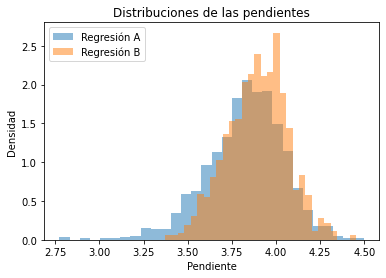

In [96]:
plt.hist(intercepts_A[~np.isnan(intercepts_A)], bins=30, alpha=0.5, label='Regresión A', density=True)
plt.hist(intercepts_B[~np.isnan(intercepts_B)], bins=30, alpha=0.5, label='Regresión B', density=True)
plt.xlabel('Pendiente')
plt.ylabel('Densidad')
plt.legend()
plt.title('Distribuciones de las pendientes')
plt.show()

from scipy.stats import mannwhitneyu

In [98]:
# Filtrar NaNs antes de la prueba
filtered_intercepts_A = intercepts_A[~np.isnan(intercepts_A)]
filtered_intercepts_B = intercepts_B[~np.isnan(intercepts_B)]

# Prueba t para comparar las pendientes
t_stat, p_value_t = ttest_ind(filtered_intercepts_A, filtered_intercepts_B, equal_var=False)
print(f"Prueba t: T-stat={t_stat}, P-value={p_value_t}")

# Prueba Mann-Whitney U
u_stat, p_value_u = mannwhitneyu(filtered_intercepts_A, filtered_intercepts_B, alternative='two-sided')
print(f"Prueba Mann-Whitney U: U-stat={u_stat}, P-value={p_value_u}")


Prueba t: T-stat=-7.6869719131126715, P-value=2.4108568423306255e-14
Prueba Mann-Whitney U: U-stat=413128.0, P-value=1.727738806781193e-11


In [99]:
import numpy as np

def confidence_interval(data, confidence=0.95):
    """Calcula el intervalo de confianza de un conjunto de datos."""
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(len(data))  # Error estándar
    margin = sem * 1.96  # Para un nivel de confianza del 95%
    return mean - margin, mean + margin

# Filtrar NaNs de los interceptos
#filtered_intercepts_A = intercepts_A[~np.isnan(intercepts_A)]
#filtered_intercepts_B = intercepts_B[~np.isnan(intercepts_B)]

# Intervalos de confianza
ci_A = confidence_interval(filtered_intercepts_A)
ci_B = confidence_interval(filtered_intercepts_B)

print(f"IC de interceptos A: {ci_A}")
print(f"IC de interceptos B: {ci_B}")


IC de interceptos A: (3.8124116080344925, 3.839612084161105)
IC de interceptos B: (3.88293926177021, 3.9039985113721367)


In [139]:
def bootstrap_percentile_ci(data, confidence=0.95):
    """Calcula el intervalo de confianza basado en percentiles."""
    lower = (1 - confidence) / 2
    upper = 1 - lower
    return np.percentile(data, lower * 100), np.percentile(data, upper * 100)

# Intervalos de confianza con percentiles
ci_A = bootstrap_percentile_ci(filtered_intercepts_A)
ci_B = bootstrap_percentile_ci(filtered_intercepts_B)

print(f"IC Percentil de interceptos A: {ci_A}")
print(f"IC Percentil de interceptos B: {ci_B}")


IC Percentil de interceptos A: (3.3293706068886646, 4.208784961893026)
IC Percentil de interceptos B: (3.5557911170521797, 4.224100149562342)


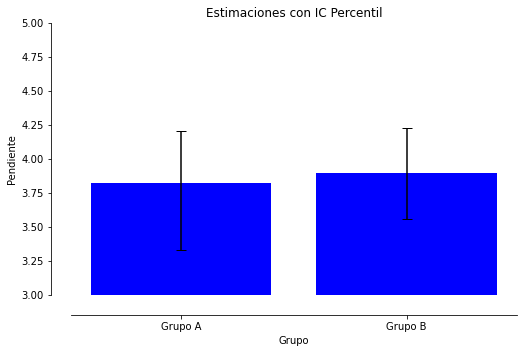

In [146]:
# Valores estimados (pueden ser pendientes de diferentes grupos)
groups = ['Grupo A', 'Grupo B']
means = [filtered_intercepts_A.mean(), filtered_intercepts_B.mean()]
lower_bounds = [ci_A[0], ci_B[0]]
upper_bounds = [ci_A[1], ci_B[1]]

# Graficar
plt.figure(figsize=(8, 5))
plt.bar(groups, height=means, 
             yerr=[np.array(means) - lower_bounds, upper_bounds - np.array(means)], 
             capsize=5, color='blue', label='Estimación con IC')
plt.title('Estimaciones con IC Percentil')
plt.ylabel('Pendiente')
plt.xlabel('Grupo')
#plt.grid(alpha=0.3)
sns.despine(offset=20)
plt.ylim(3,5)
plt.savefig('sigma_zero_comparisons_percentile_ci.svg', format='svg', transparent=True, bbox_inches='tight')
plt.show()

In [101]:
from scipy.stats import ks_2samp

# Prueba KS para comparar distribuciones
ks_stat, p_value_ks = ks_2samp(filtered_intercepts_A, filtered_intercepts_B)
print(f"Prueba KS: KS-stat={ks_stat}, P-value={p_value_ks}")


Prueba KS: KS-stat=0.135, P-value=2.321597219050034e-08


In [108]:
import pingouin as pg
pg.compute_bootci(filtered_intercepts_A, filtered_intercepts_B, func='cohen', method='per')

array([-0.43, -0.26])

In [107]:
filtered_intercepts_A.shape

(1000,)

Another approach using the means of bootstrapping

In [118]:
import numpy as np

# Supongamos que Y_boot es un array de dimensiones (n_points, n_bootstraps)
# Calcular la media para cada punto de X
Y_means_A = np.nanmean(y_flat_og, axis=1)  # Para la regresión A
Y_means_B = np.nanmean(y_flat_w, axis=1)  # Para la regresión B

# Ajustar regresión para el conjunto A
slope_A, intercept_A, r_value_A, p_value_A, std_err_A = linregress(x_flat_og, Y_means_A)

# Ajustar regresión para el conjunto B
slope_B, intercept_B, r_value_B, p_value_B, std_err_B = linregress(x_flat_w, Y_means_B)
print(f"Pendiente A: {slope_A}, Intercepto A: {intercept_A}")
print(f"Pendiente B: {slope_B}, Intercepto B: {intercept_B}")

import pandas as pd

# Crear un DataFrame combinado
data = pd.DataFrame({
    'X': np.concatenate([x_flat_og, x_flat_w]),
    'Y': np.concatenate([Y_means_A, Y_means_B]),
    'Group': ['A'] * len(x_flat_og) + ['B'] * len(x_flat_w)
})


import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ajustar el modelo ANCOVA
model = smf.ols('Y ~ X + Group', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

eta_squared = anova_table.loc['Group', 'sum_sq'] / anova_table['sum_sq'].sum()
print(f"Tamaño del efecto (eta^2): {eta_squared}")

print(model.conf_int())  # Intervalos de confianza para los coeficientes


Pendiente A: -0.01079778755248598, Intercepto A: 3.823018030117972
Pendiente B: -0.12175645528155125, Intercepto B: 3.8934688865711733
            sum_sq    df         F    PR(>F)
Group     0.384316   1.0  9.011178  0.013301
X         0.212778   1.0  4.989087  0.049537
Residual  0.426488  10.0       NaN       NaN
Tamaño del efecto (eta^2): 0.37546159561763187
                   0         1
Intercept   3.726350  4.339566
Group[T.B] -0.604601 -0.089444
X          -0.126410 -0.000155


In [117]:
print(model.params)  # Coeficientes estimados


Intercept       3.823018
Group[T.B]      0.070451
X              -0.010798
X:Group[T.B]   -0.110959
dtype: float64


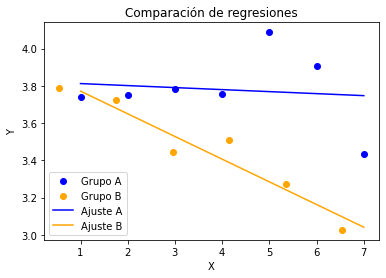

In [113]:
import matplotlib.pyplot as plt

# Generar valores predichos
X_fit = np.linspace(min(x_flat_og), max(x_flat_og), 100)
Y_pred_A = slope_A * X_fit + intercept_A
Y_pred_B = slope_B * X_fit + intercept_B

# Graficar
plt.scatter(x_flat_og, Y_means_A, label='Grupo A', color='blue')
plt.scatter(x_flat_w, Y_means_B, label='Grupo B', color='orange')
plt.plot(X_fit, Y_pred_A, label='Ajuste A', color='blue')
plt.plot(X_fit, Y_pred_B, label='Ajuste B', color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Comparación de regresiones')
plt.show()


In [128]:
x_linear_w = x_linear_w[:10]
print(x_linear_w)

[ 8.94191912 10.14030458 11.33869005 12.53707551 13.73546098 14.93384644
 16.13223191 17.33061737 18.52900284 19.7273883 ]


In [131]:
import numpy as np

# Supongamos que Y_boot es un array de dimensiones (n_points, n_bootstraps)
# Calcular la media para cada punto de X
Y_means_A = np.nanmean(y_linear_og, axis=1)  # Para la regresión A
Y_means_B = np.nanmean(y_linear_w, axis=1)  # Para la regresión B

# Ajustar regresión para el conjunto A
slope_A, intercept_A, r_value_A, p_value_A, std_err_A = linregress(x_linear_og, Y_means_A)

# Ajustar regresión para el conjunto B
slope_B, intercept_B, r_value_B, p_value_B, std_err_B = linregress(x_linear_w, Y_means_B[:10])
print(f"Pendiente A: {slope_A}, Intercepto A: {intercept_A}")
print(f"Pendiente B: {slope_B}, Intercepto B: {intercept_B}")

import pandas as pd

# Crear un DataFrame combinado
data = pd.DataFrame({
    'X': np.concatenate([x_linear_og, x_linear_w[:10]]),
    'Y': np.concatenate([Y_means_A, Y_means_B[:10]]),
    'Group': ['A'] * len(x_linear_og) + ['B'] * len(x_linear_w[:10])
})


import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ajustar el modelo ANCOVA
model = smf.ols('Y ~ X * Group', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

eta_squared = anova_table.loc['Group', 'sum_sq'] / anova_table['sum_sq'].sum()
print(f"Tamaño del efecto (eta^2): {eta_squared}")

print(model.conf_int())  # Intervalos de confianza para los coeficientes


Pendiente A: 0.3026162621437897, Intercepto A: 1.2040018577705345
Pendiente B: 0.3364311149316824, Intercepto B: 1.0315886669993164
             sum_sq    df           F        PR(>F)
Group      0.540385   1.0    5.454413  3.129296e-02
X         26.431690   1.0  266.790226  3.074151e-12
X:Group    0.074090   1.0    0.747831  3.985424e-01
Residual   1.783313  18.0         NaN           NaN
Tamaño del efecto (eta^2): 0.01874417227506139
                     0         1
Intercept     0.379752  2.028252
Group[T.B]   -1.389592  1.044766
X             0.247317  0.357916
X:Group[T.B] -0.048337  0.115966


/var/folders/xy/wcn_mfbd55s9g3lg4nhmyp_m0000gn/T/ipykernel_66191/2914197882.py:6: RuntimeWarning: Mean of empty slice
  Y_means_B = np.nanmean(y_linear_w, axis=1)  # Para la regresión B


In [132]:
data

,X,Y,Group
0,9.000000,4.064914,A
1,10.000000,4.377582,A
2,11.000000,4.114953,A
3,12.000000,4.928270,A
4,13.000000,5.090989,A
5,14.000000,5.334949,A
6,15.000000,5.723038,A
7,16.000000,6.384751,A
8,17.000000,6.048704,A
9,18.000000,7.004882,A


In [120]:
print(data['X'].std())  # Revisa la desviación estándar de X
print(data['Group'].unique())  # Asegúrate de que haya más de un grupo


4.1882759735313835
['A' 'B']


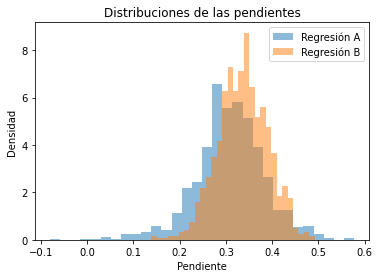

Prueba t: T-stat=-9.44386826102659, P-value=1.0734723700374465e-20
Prueba Mann-Whitney U: U-stat=378412.0, P-value=4.696113324788562e-21


In [121]:
slopes_A, intercepts_A = remove_nans_per_bootstrap(x_linear_og, y_linear_og)
slopes_B, intercepts_B = remove_nans_per_bootstrap(x_linear_w, y_linear_w)
plt.hist(slopes_A[~np.isnan(slopes_A)], bins=30, alpha=0.5, label='Regresión A', density=True)
plt.hist(slopes_B[~np.isnan(slopes_B)], bins=30, alpha=0.5, label='Regresión B', density=True)
plt.xlabel('Pendiente')
plt.ylabel('Densidad')
plt.legend()
plt.title('Distribuciones de las pendientes')
plt.show()

from scipy.stats import mannwhitneyu

# Filtrar NaNs antes de la prueba
filtered_slopes_A = slopes_A[~np.isnan(slopes_A)]
filtered_slopes_B = slopes_B[~np.isnan(slopes_B)]

# Prueba t para comparar las pendientes
t_stat, p_value_t = ttest_ind(filtered_slopes_A, filtered_slopes_B, equal_var=False)
print(f"Prueba t: T-stat={t_stat}, P-value={p_value_t}")

# Prueba Mann-Whitney U
u_stat, p_value_u = mannwhitneyu(filtered_slopes_A, filtered_slopes_B, alternative='two-sided')
print(f"Prueba Mann-Whitney U: U-stat={u_stat}, P-value={p_value_u}")

In [149]:
def bootstrap_percentile_ci(data, confidence=0.95):
    """Calcula el intervalo de confianza basado en percentiles."""
    lower = (1 - confidence) / 2
    upper = 1 - lower
    return np.percentile(data, lower * 100), np.percentile(data, upper * 100)

# Intervalos de confianza con percentiles
ci_A = bootstrap_percentile_ci(filtered_slopes_A)
ci_B = bootstrap_percentile_ci(filtered_slopes_B)

print(f"IC Percentil de slopes A: {ci_A}")
print(f"IC Percentil de slopes B: {ci_B}")

IC Percentil de slopes A: (0.14121909699138901, 0.46410163812798993)
IC Percentil de slopes B: (0.23279115057229088, 0.4399698537550753)


In [147]:
# Intervalos de confianza
ci_A = confidence_interval(filtered_slopes_A)
ci_B = confidence_interval(filtered_slopes_B)

print(f"IC de slopes A: {ci_A}")
print(f"IC de slopes B: {ci_B}")

import pingouin as pg
pg.compute_bootci(filtered_slopes_A, filtered_slopes_B, func='cohen', method='per')


# Prueba KS para comparar distribuciones
ks_stat, p_value_ks = ks_2samp(filtered_slopes_A, filtered_slopes_B)
print(f"Prueba KS: KS-stat={ks_stat}, P-value={p_value_ks}")

IC de slopes A: (0.30375064825177595, 0.31322118274628236)
IC de slopes B: (0.33308223782569557, 0.3397799920376702)
Prueba KS: KS-stat=0.211, P-value=6.754654990327923e-20


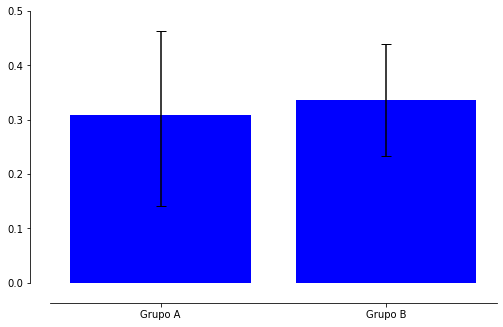

In [152]:
# Valores estimados (pueden ser pendientes de diferentes grupos)
groups = ['Grupo A', 'Grupo B']
means = [filtered_slopes_A.mean(), filtered_slopes_B.mean()]
lower_bounds = [ci_A[0], ci_B[0]]
upper_bounds = [ci_A[1], ci_B[1]]

# Graficar
plt.figure(figsize=(8, 5))
plt.bar(groups, height=means, 
             yerr=[np.array(means) - lower_bounds, upper_bounds - np.array(means)], 
             capsize=5, color='blue', label='Estimación con IC')
#plt.grid(alpha=0.3)
sns.despine(offset=20)
plt.ylim(0,0.5)
plt.savefig('slope_comparisons_percentile_ci.svg', format='svg', transparent=True, bbox_inches='tight')
plt.show()
